In [21]:
from apportionment import *

In [22]:
# for year in constants.years:
#     raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=False, year=year)
#     raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=True, year=year)

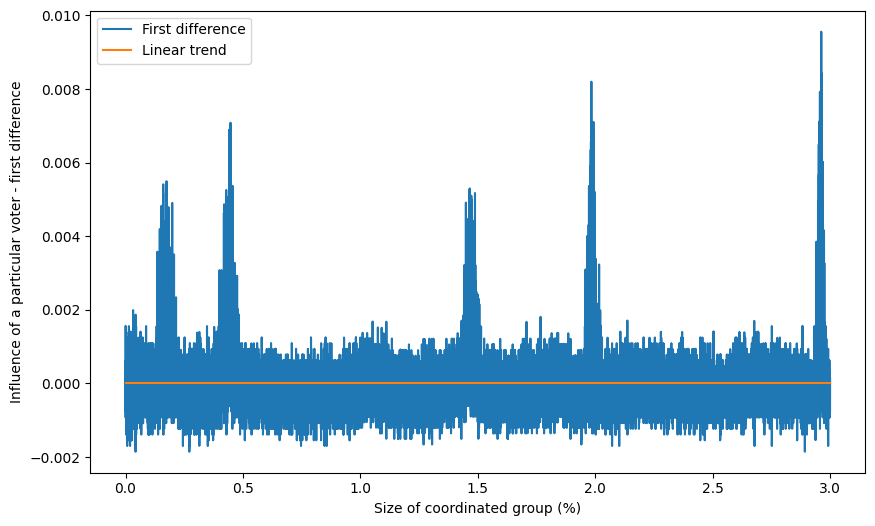

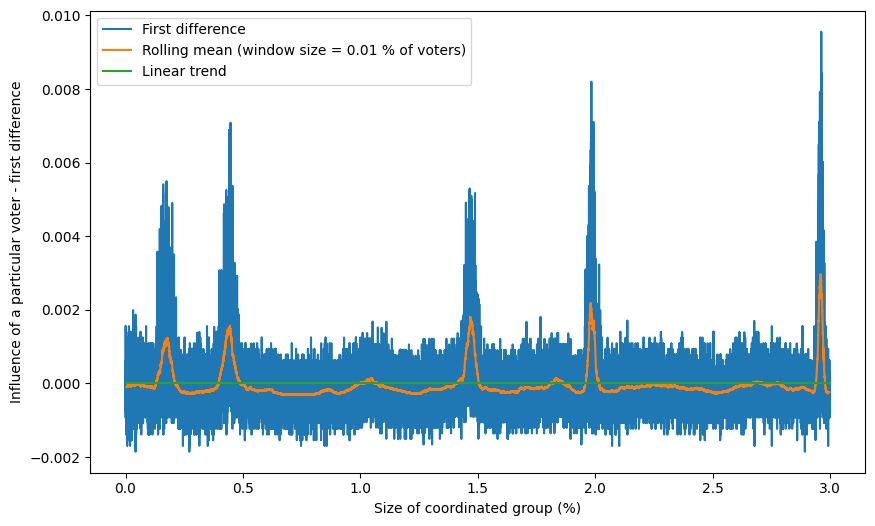

In [23]:
df = pd.read_csv("./vis_data/unweighted-vis-1m-2023.csv")

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of coordinated group (%)')
plt.ylabel('Influence of a particular voter - first difference')

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of coordinated group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.legend()
plt.show()

first peek location for 1m: 7785
first peek location for 4,5m: 7818
second peek location for 1m: 19311
second peek location for 4,5m: 19106


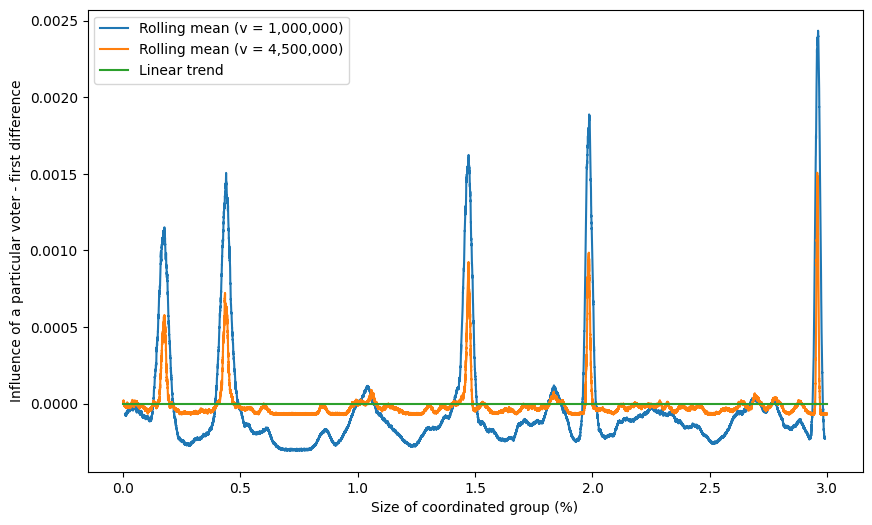

In [24]:
df = pd.read_csv("./vis_data/unweighted-vis-1m-2023.csv")
df2 = pd.read_csv("./vis_data/unweighted-vis-4_5m-2023.csv")

window = 200

x_values = (df['samples'] / 1000000) * 100
x_values2 = (df2['samples'] / 4500000) * 100

y_values = df['diff']
y_values2 = df2['diff']
y_vals =  y_values - (3 * x_values)
y_vals2 =  y_values2 - (3 * x_values2)


y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=window, center=True).mean()

y_deriv2 = y_vals2.diff()
y_rolling2 = y_deriv2.rolling(window=window, center=True).mean()

x = np.arange(0, 4)
y = 3 * x


plt.figure(figsize=(10, 6))

plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (v = 1,000,000)")
plt.plot(x_values2, y_rolling2, '-', markersize=1, label="Rolling mean (v = 4,500,000)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of coordinated group (%)')
plt.ylabel('Influence of a particular voter - first difference')

plt.legend()

print(f'first peek location for 1m: { int(y_rolling[:3000].idxmax() * (4388872 / 1000000))}')
print(f'first peek location for 4,5m: { int(y_rolling2[:10000].idxmax() * (4388872 / 4500000))}')

print(f'second peek location for 1m: { int(y_rolling[:5000].idxmax() * (4388872 / 1000000))}')
print(f'second peek location for 4,5m: { int(y_rolling2[:45000].idxmax() * (4388872 / 4500000))}')

plt.show()